In [1]:
# Importing Useful Libraries

import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
from os import listdir
import os
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings("ignore")

In [2]:
!pip install split_folders

In [3]:
import splitfolders

In [90]:
input_folder=r'data/input'
output=r'data/image'

In [91]:
splitfolders.ratio(input_folder,output,seed=42,ratio=(.65,.15,.2))

Copying files: 915 files [01:32,  9.93 files/s]


In [92]:
help(splitfolders.ratio)

Help on function ratio in module splitfolders.split:

ratio(input, output='output', seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None)



In [93]:
input_shape=(224,224,3)
img_height,img_width=(224,224)
batch_size=25

In [94]:
train_data_dir=r'data\image\train'
valid_data_dir=r'data\image\val'
test_data_dir=r'data\image\test'

In [95]:
file1 = os.listdir(r'data/image/Train')
file1

['Jeans_Images', 'Sarees_Images', 'Trousers_Images']

In [96]:
# Training Data Generator( Data Augmentation on Training Images)

Train_generator_augmented=ImageDataGenerator(rescale=1./255,
                                             zoom_range=0.2,
                                             rotation_range=30,
                                             horizontal_flip=True)
Train_generator=Train_generator_augmented.flow_from_directory(train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')



Found 594 images belonging to 3 classes.


In [97]:
# Validation Data Generator
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(valid_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 135 images belonging to 3 classes.


In [98]:
#test generator
test_generator=Data_gen.flow_from_directory(test_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')


Found 186 images belonging to 3 classes.


In [99]:
print("Count of Training Images")
print("No.of Images of Sarees in train dataset -> ",len(os.listdir(r'data/image/train/Sarees_Images')))
print("No.of Images of Jeans in train dataset -> ",len(os.listdir(r'data/image/train/Jeans_Images')))
print("No.of Images of Trousers in train dataset ->",len(os.listdir(r'data/image/train/Trousers_Images')))
"\n"

print("Count of validation Images")
print("No.of Images of Sarees in validation dataset-> ",len(os.listdir(r'data/image/val/Sarees_Images')))
print("No.of Images of Jeans in validation dataset ->",len(os.listdir(r'data/image/val/Jeans_Images')))
print("No.of Images of Trousers in validation dataset-> ",len(os.listdir(r'data/image/val/Trousers_Images')))

print("Count of Test Images")
print("No.of Images of Sarees in test dataset-> ",len(os.listdir(r'data/image/test/Sarees_Images')))
print("No.of Images of Jeans in test dataset ->",len(os.listdir(r'data/image/test/Jeans_Images')))
print("No.of Images of Trousers in test dataset-> ",len(os.listdir(r'data/image/test/Trousers_Images')))

Count of Training Images
No.of Images of Sarees in train dataset ->  198
No.of Images of Jeans in train dataset ->  198
No.of Images of Trousers in train dataset -> 198
Count of validation Images
No.of Images of Sarees in validation dataset->  45
No.of Images of Jeans in validation dataset -> 45
No.of Images of Trousers in validation dataset->  45
Count of Test Images
No.of Images of Sarees in test dataset->  62
No.of Images of Jeans in test dataset -> 62
No.of Images of Trousers in test dataset->  62


In [100]:
input_shape=(224,224,3)
img_width=224
img_height=224
batch_size=25
epoch=100
train_samples=213
val_samples=45
test_samples=62

In [101]:
# Creating the model
model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_12 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_13 (Activation)   (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 32)       

In [102]:
# Defining Early stopping and Model check point
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
MC = ModelCheckpoint('best1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [103]:
# Fitting the Training Data
history = model.fit_generator(
    Train_generator, 
    epochs=100,
    validation_data=validation_generator,
    validation_steps=val_samples//batch_size,
    steps_per_epoch=train_samples//batch_size,
    callbacks=[ES,MC])

Epoch 1/100
8/8 [==============================] - 63s 5s/step - loss: 1.1983 - accuracy: 0.3918 - val_loss: 1.0802 - val_accuracy: 0.4800

Epoch 00001: val_accuracy improved from -inf to 0.48000, saving model to best1.h5
Epoch 2/100
8/8 [==============================] - 21s 3s/step - loss: 1.1051 - accuracy: 0.3144 - val_loss: 1.0975 - val_accuracy: 0.3200

Epoch 00002: val_accuracy did not improve from 0.48000
Epoch 3/100
8/8 [==============================] - 22s 3s/step - loss: 1.0698 - accuracy: 0.4650 - val_loss: 1.0849 - val_accuracy: 0.5200

Epoch 00003: val_accuracy improved from 0.48000 to 0.52000, saving model to best1.h5
Epoch 4/100
8/8 [==============================] - 18s 2s/step - loss: 0.9669 - accuracy: 0.5650 - val_loss: 0.9727 - val_accuracy: 0.5600

Epoch 00004: val_accuracy improved from 0.52000 to 0.56000, saving model to best1.h5
Epoch 5/100
8/8 [==============================] - 18s 2s/step - loss: 0.6835 - accuracy: 0.6700 - val_loss: 0.6827 - val_accuracy: 0

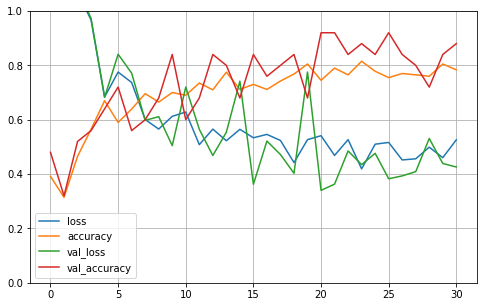

In [104]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [105]:
#Saving the best model
model.save('best1.h5')


In [106]:
losses = pd.DataFrame(model.history.history)
losses

loss  accuracy  val_loss  val_accuracy
0   1.198343  0.391753  1.080240          0.48
1   1.105081  0.314433  1.097501          0.32
2   1.069762  0.465000  1.084920          0.52
3   0.966886  0.565000  0.972720          0.56
4   0.683512  0.670000  0.682677          0.64
5   0.775307  0.590000  0.840835          0.72
6   0.736859  0.639175  0.771342          0.56
7   0.600646  0.695876  0.597666          0.60
8   0.565619  0.664948  0.611202          0.68
9   0.612533  0.700000  0.504765          0.84
10  0.628281  0.690000  0.720340          0.60
11  0.508197  0.735000  0.564876          0.68
12  0.565439  0.710000  0.468266          0.84
13  0.522660  0.775000  0.553887          0.80
14  0.564670  0.711340  0.741814          0.68
15  0.533530  0.730000  0.362448          0.84
16  0.545954  0.711340  0.521548          0.76
17  0.523703  0.742268  0.471878          0.80
18  0.442303  0.768041  0.402854          0.84
19  0.526689  0.805000  0.775417          0.68
20  0.541157  0.745000  0.340120          0.92
21  0.468626  0.790000  0.363015          0.92
22  0.526760  0.765000  0.485097          0.84
23  0.419222  0.815000  0.434638          0.88
24  0.509983  0.778351  0.476457          0.84
25  0.516393  0.755000  0.382761          0.92
26  0.451975  0.770000  0.393330          0.84
27  0.456250  0.765000  0.408955          0.80
28  0.498892  0.760000  0.530859          0.72
29  0.460366  0.805000  0.438925          0.84
30  0.526076  0.783505  0.426044          0.88

In [107]:
# Model Evaluation
evl=model.evaluate(test_generator)
print("Test Loss",evl[0])
print("Test Accuracy",evl[1])

8/8 [==============================] - 5s 663ms/step - loss: 0.5090 - accuracy: 0.8065
Test Loss 0.5090116858482361
Test Accuracy 0.8064516186714172


# Prediction

In [108]:
#Loading the saved model
model = load_model('best1.h5')

In [109]:
#creating instances where elements from test directory will be called
test_jeans=r'data/image/test/Jeans_Images'
test_saree=r'data/image/test/Sarees_Images'
test_trouser=r'data/image/test/Trousers_Images'

In [110]:
print(test_generator.class_indices)

{'Jeans_Images': 0, 'Sarees_Images': 1, 'Trousers_Images': 2}


# Displaying Predicted images.

Input Image is: img101.jpeg


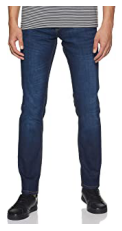

Predicted Label is: [2] 

Input Image is: img11.jpeg


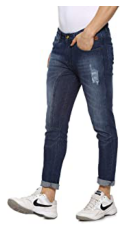

Predicted Label is: [0] 

Input Image is: img110.jpeg


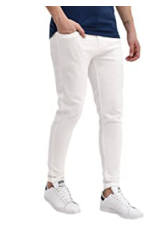

Predicted Label is: [2] 

Input Image is: img112.jpeg


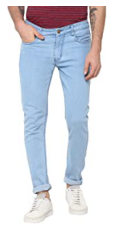

Predicted Label is: [2] 

Input Image is: img113.jpeg


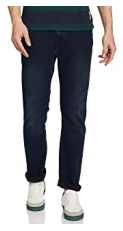

Predicted Label is: [0] 

Input Image is: img117.jpeg


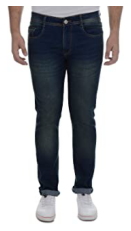

Predicted Label is: [0] 

Input Image is: img119.jpeg


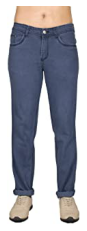

Predicted Label is: [2] 

Input Image is: img12.jpeg


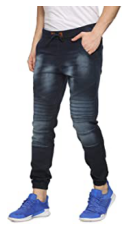

Predicted Label is: [2] 

Input Image is: img121.jpeg


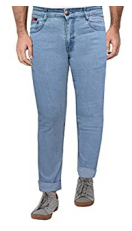

Predicted Label is: [2] 

Input Image is: img130.jpeg


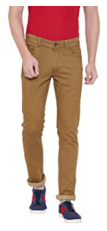

Predicted Label is: [2] 

Input Image is: img135.jpeg


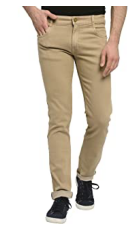

Predicted Label is: [2] 

Input Image is: img139.jpeg


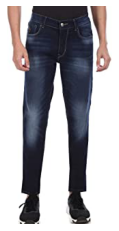

Predicted Label is: [0] 

Input Image is: img141.jpeg


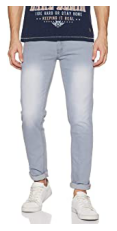

Predicted Label is: [2] 

Input Image is: img143.jpeg


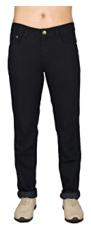

Predicted Label is: [2] 

Input Image is: img146.jpeg


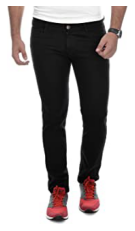

Predicted Label is: [0] 

Input Image is: img150.jpeg


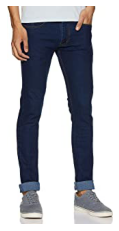

Predicted Label is: [2] 

Input Image is: img152.jpeg


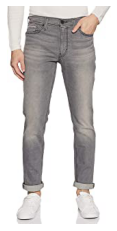

Predicted Label is: [2] 

Input Image is: img156.jpeg


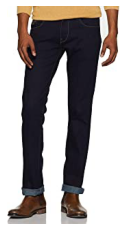

Predicted Label is: [0] 

Input Image is: img163.jpeg


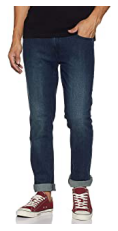

Predicted Label is: [0] 

Input Image is: img166.jpeg


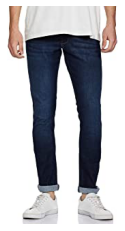

Predicted Label is: [2] 

Input Image is: img170.jpeg


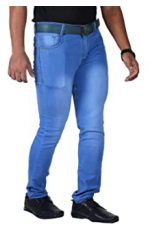

Predicted Label is: [0] 

Input Image is: img172.jpeg


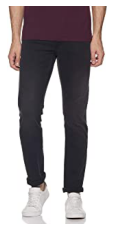

Predicted Label is: [0] 

Input Image is: img187.jpeg


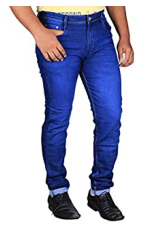

Predicted Label is: [0] 

Input Image is: img188.jpeg


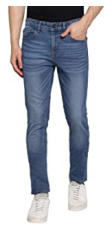

Predicted Label is: [0] 

Input Image is: img190.jpeg


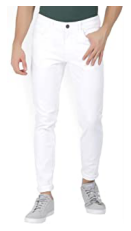

Predicted Label is: [2] 

Input Image is: img199.jpeg


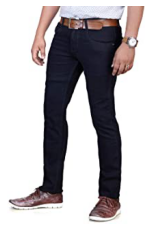

Predicted Label is: [2] 

Input Image is: img2.jpeg


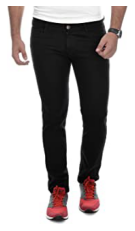

Predicted Label is: [0] 

Input Image is: img20.jpeg


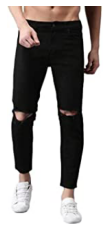

Predicted Label is: [0] 

Input Image is: img201.jpeg


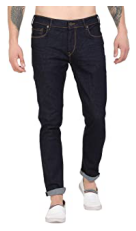

Predicted Label is: [0] 

Input Image is: img203.jpeg


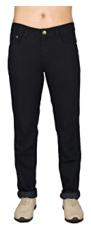

Predicted Label is: [2] 

Input Image is: img206.jpeg


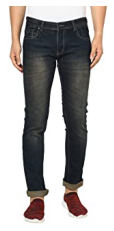

Predicted Label is: [2] 

Input Image is: img211.jpeg


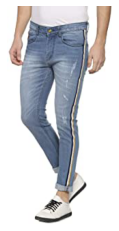

Predicted Label is: [2] 

Input Image is: img220.jpeg


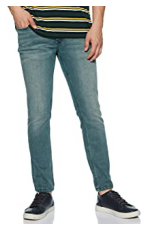

Predicted Label is: [2] 

Input Image is: img225.jpeg


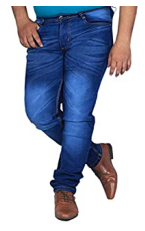

Predicted Label is: [0] 

Input Image is: img227.jpeg


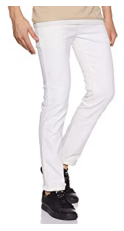

Predicted Label is: [1] 

Input Image is: img234.jpeg


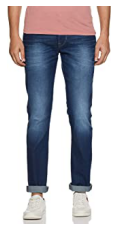

Predicted Label is: [0] 

Input Image is: img245.jpeg


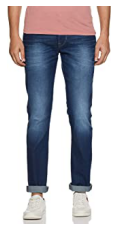

Predicted Label is: [0] 

Input Image is: img254.jpeg


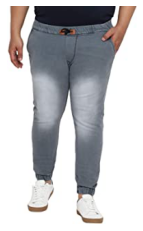

Predicted Label is: [0] 

Input Image is: img256.jpeg


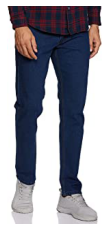

Predicted Label is: [0] 

Input Image is: img258.jpeg


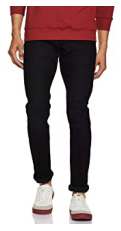

Predicted Label is: [0] 

Input Image is: img264.jpeg


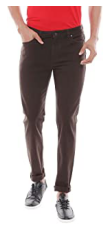

Predicted Label is: [0] 

Input Image is: img266.jpeg


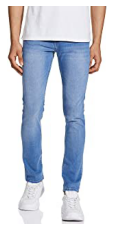

Predicted Label is: [2] 

Input Image is: img273.jpeg


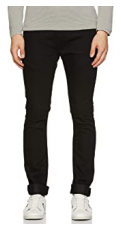

Predicted Label is: [2] 

Input Image is: img274.jpeg


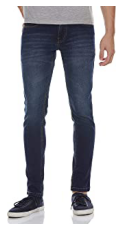

Predicted Label is: [2] 

Input Image is: img277.jpeg


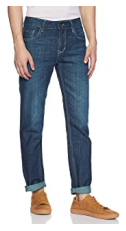

Predicted Label is: [0] 

Input Image is: img292.jpeg


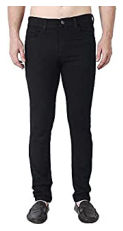

Predicted Label is: [0] 

Input Image is: img294.jpeg


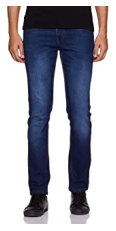

Predicted Label is: [0] 

Input Image is: img296.jpeg


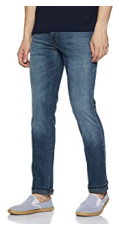

Predicted Label is: [0] 

Input Image is: img299.jpeg


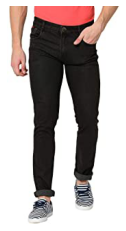

Predicted Label is: [0] 

Input Image is: img305.jpeg


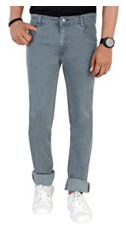

Predicted Label is: [0] 

Input Image is: img36.jpeg


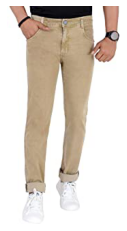

Predicted Label is: [2] 

Input Image is: img51.jpeg


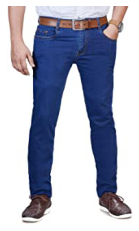

Predicted Label is: [0] 

Input Image is: img54.jpeg


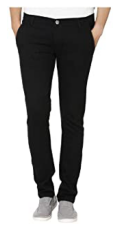

Predicted Label is: [0] 

Input Image is: img57.jpeg


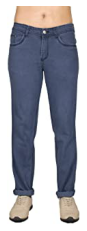

Predicted Label is: [2] 

Input Image is: img76.jpeg


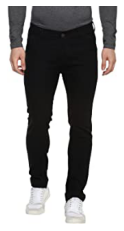

Predicted Label is: [0] 

Input Image is: img78.jpeg


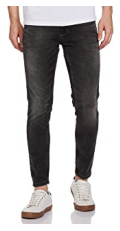

Predicted Label is: [2] 

Input Image is: img83.jpeg


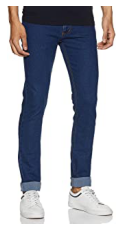

Predicted Label is: [0] 

Input Image is: img88.jpeg


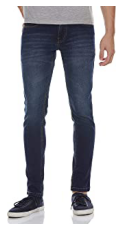

Predicted Label is: [2] 

Input Image is: img90.jpeg


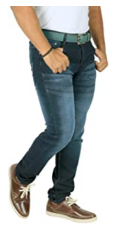

Predicted Label is: [2] 

Input Image is: img92.jpeg


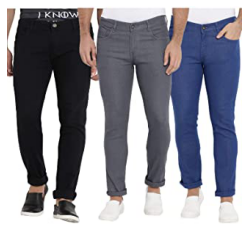

Predicted Label is: [0] 

Input Image is: img93.jpeg


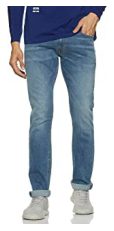

Predicted Label is: [0] 

Input Image is: img94.jpeg


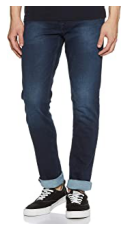

Predicted Label is: [2] 

Input Image is: img101.jpeg


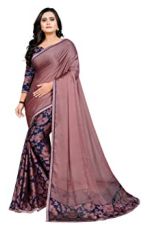

Predicted Label is: [1] 

Input Image is: img11.jpeg


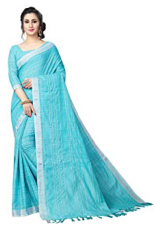

Predicted Label is: [1] 

Input Image is: img110.jpeg


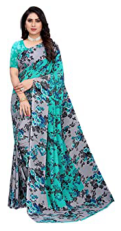

Predicted Label is: [1] 

Input Image is: img112.jpeg


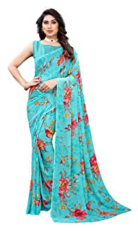

Predicted Label is: [1] 

Input Image is: img113.jpeg


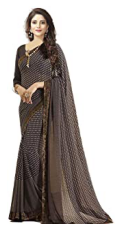

Predicted Label is: [1] 

Input Image is: img117.jpeg


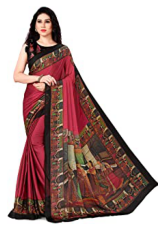

Predicted Label is: [1] 

Input Image is: img119.jpeg


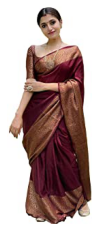

Predicted Label is: [1] 

Input Image is: img12.jpeg


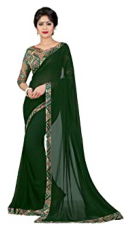

Predicted Label is: [1] 

Input Image is: img121.jpeg


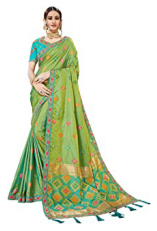

Predicted Label is: [1] 

Input Image is: img130.jpeg


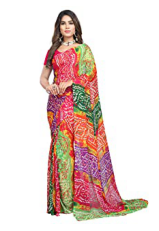

Predicted Label is: [1] 

Input Image is: img135.jpeg


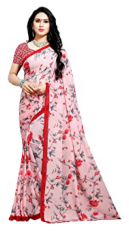

Predicted Label is: [1] 

Input Image is: img139.jpeg


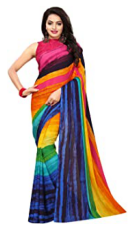

Predicted Label is: [1] 

Input Image is: img141.jpeg


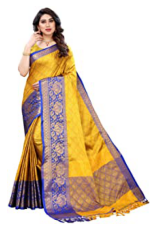

Predicted Label is: [1] 

Input Image is: img143.jpeg


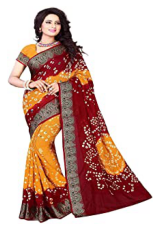

Predicted Label is: [1] 

Input Image is: img146.jpeg


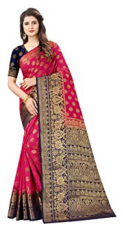

Predicted Label is: [1] 

Input Image is: img150.jpeg


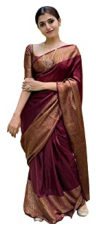

Predicted Label is: [1] 

Input Image is: img152.jpeg


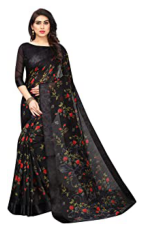

Predicted Label is: [1] 

Input Image is: img156.jpeg


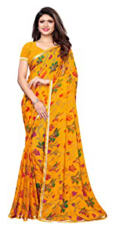

Predicted Label is: [1] 

Input Image is: img163.jpeg


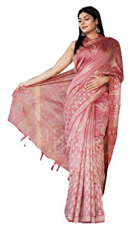

Predicted Label is: [2] 

Input Image is: img166.jpeg


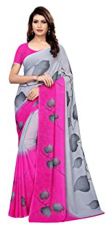

Predicted Label is: [1] 

Input Image is: img170.jpeg


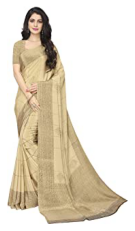

Predicted Label is: [1] 

Input Image is: img172.jpeg


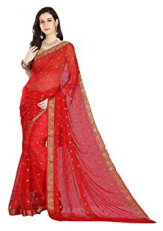

Predicted Label is: [1] 

Input Image is: img187.jpeg


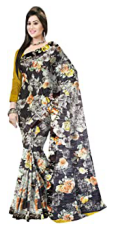

Predicted Label is: [1] 

Input Image is: img188.jpeg


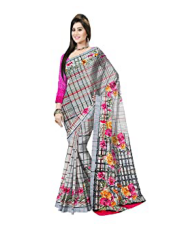

Predicted Label is: [1] 

Input Image is: img190.jpeg


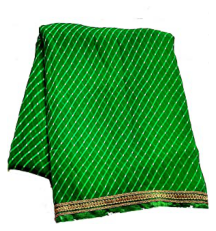

Predicted Label is: [1] 

Input Image is: img199.jpeg


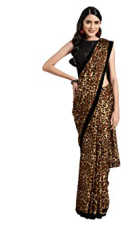

Predicted Label is: [2] 

Input Image is: img2.jpeg


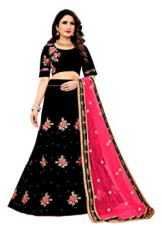

Predicted Label is: [1] 

Input Image is: img20.jpeg


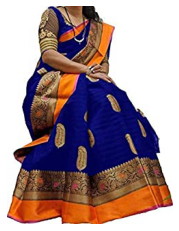

Predicted Label is: [1] 

Input Image is: img201.jpeg


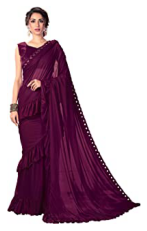

Predicted Label is: [1] 

Input Image is: img203.jpeg


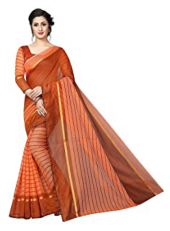

Predicted Label is: [1] 

Input Image is: img206.jpeg


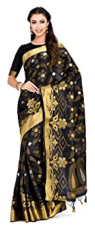

Predicted Label is: [1] 

Input Image is: img211.jpeg


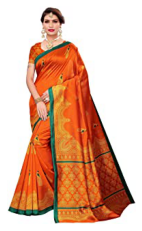

Predicted Label is: [1] 

Input Image is: img220.jpeg


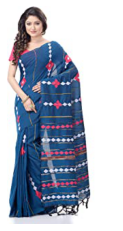

Predicted Label is: [1] 

Input Image is: img225.jpeg


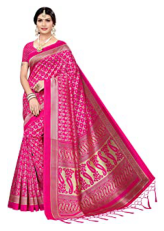

Predicted Label is: [1] 

Input Image is: img227.jpeg


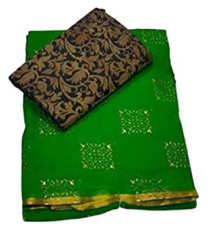

Predicted Label is: [1] 

Input Image is: img234.jpeg


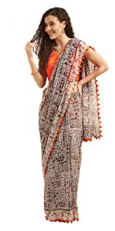

Predicted Label is: [1] 

Input Image is: img245.jpeg


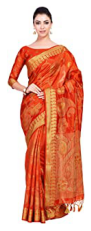

Predicted Label is: [1] 

Input Image is: img254.jpeg


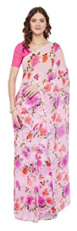

Predicted Label is: [1] 

Input Image is: img256.jpeg


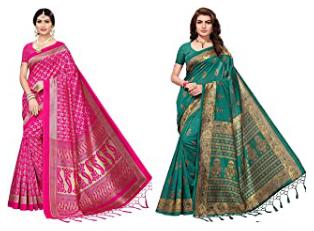

Predicted Label is: [1] 

Input Image is: img258.jpeg


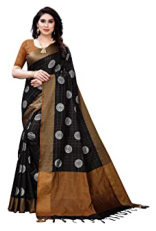

Predicted Label is: [1] 

Input Image is: img264.jpeg


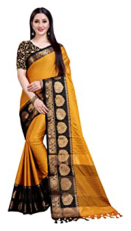

Predicted Label is: [1] 

Input Image is: img266.jpeg


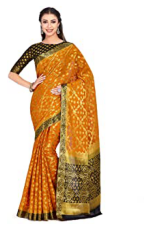

Predicted Label is: [1] 

Input Image is: img273.jpeg


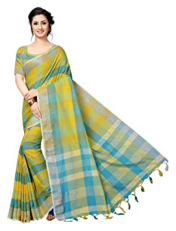

Predicted Label is: [1] 

Input Image is: img274.jpeg


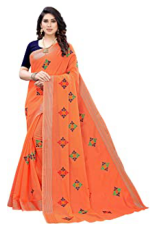

Predicted Label is: [1] 

Input Image is: img277.jpeg


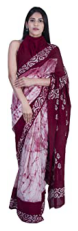

Predicted Label is: [1] 

Input Image is: img292.jpeg


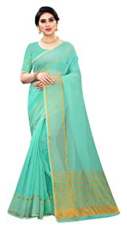

Predicted Label is: [1] 

Input Image is: img294.jpeg


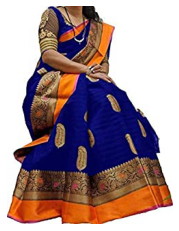

Predicted Label is: [1] 

Input Image is: img296.jpeg


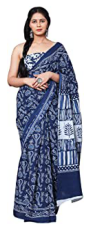

Predicted Label is: [1] 

Input Image is: img299.jpeg


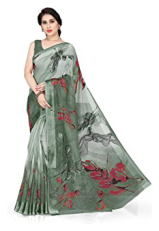

Predicted Label is: [1] 

Input Image is: img305.jpeg


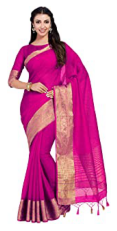

Predicted Label is: [1] 

Input Image is: img36.jpeg


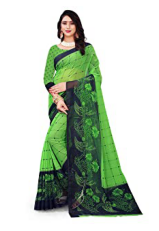

Predicted Label is: [1] 

Input Image is: img51.jpeg


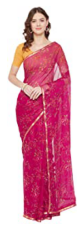

Predicted Label is: [1] 

Input Image is: img54.jpeg


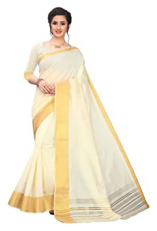

Predicted Label is: [1] 

Input Image is: img57.jpeg


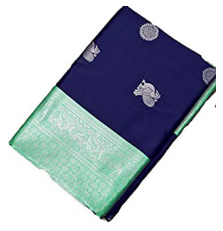

Predicted Label is: [0] 

Input Image is: img76.jpeg


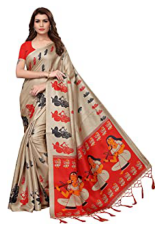

Predicted Label is: [1] 

Input Image is: img78.jpeg


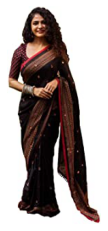

Predicted Label is: [1] 

Input Image is: img83.jpeg


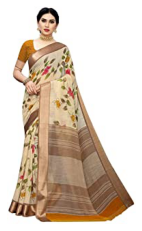

Predicted Label is: [1] 

Input Image is: img88.jpeg


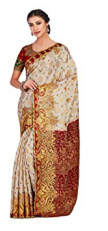

Predicted Label is: [1] 

Input Image is: img90.jpeg


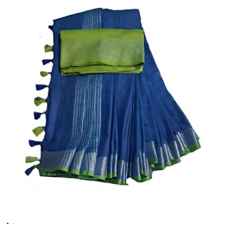

Predicted Label is: [0] 

Input Image is: img92.jpeg


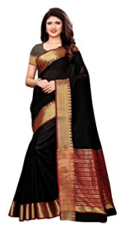

Predicted Label is: [1] 

Input Image is: img93.jpeg


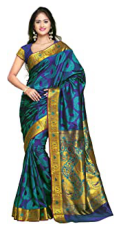

Predicted Label is: [1] 

Input Image is: img94.jpeg


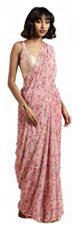

Predicted Label is: [1] 

Input Image is: img101.jpeg


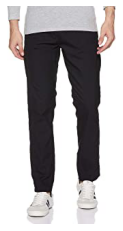

Predicted Label is: [2] 

Input Image is: img11.jpeg


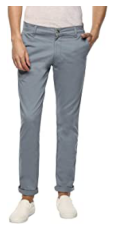

Predicted Label is: [2] 

Input Image is: img110.jpeg


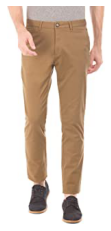

Predicted Label is: [2] 

Input Image is: img112.jpeg


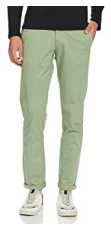

Predicted Label is: [2] 

Input Image is: img113.jpeg


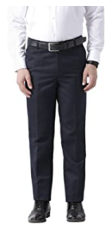

Predicted Label is: [2] 

Input Image is: img117.jpeg


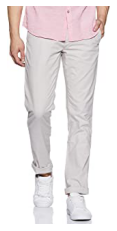

Predicted Label is: [2] 

Input Image is: img119.jpeg


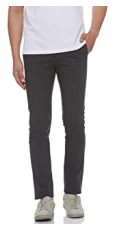

Predicted Label is: [2] 

Input Image is: img12.jpeg


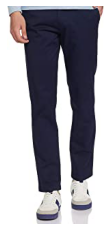

Predicted Label is: [0] 

Input Image is: img121.jpeg


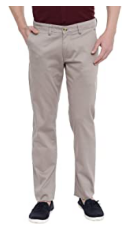

Predicted Label is: [2] 

Input Image is: img130.jpeg


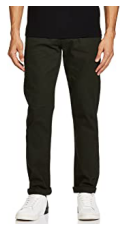

Predicted Label is: [2] 

Input Image is: img135.jpeg


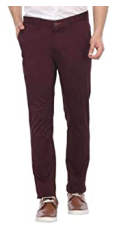

Predicted Label is: [2] 

Input Image is: img139.jpeg


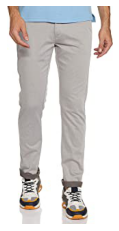

Predicted Label is: [2] 

Input Image is: img141.jpeg


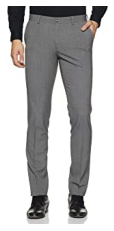

Predicted Label is: [2] 

Input Image is: img143.jpeg


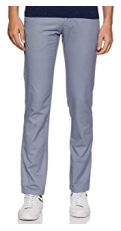

Predicted Label is: [2] 

Input Image is: img146.jpeg


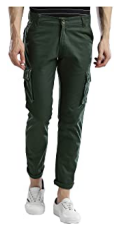

Predicted Label is: [0] 

Input Image is: img150.jpeg


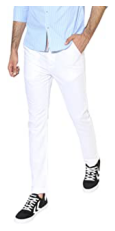

Predicted Label is: [2] 

Input Image is: img152.jpeg


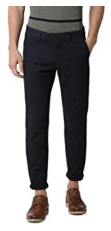

Predicted Label is: [2] 

Input Image is: img156.jpeg


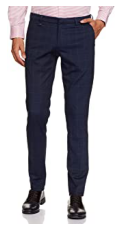

Predicted Label is: [2] 

Input Image is: img163.jpeg


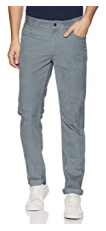

Predicted Label is: [2] 

Input Image is: img166.jpeg


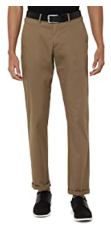

Predicted Label is: [2] 

Input Image is: img170.jpeg


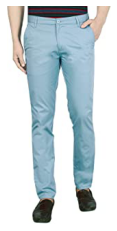

Predicted Label is: [2] 

Input Image is: img172.jpeg


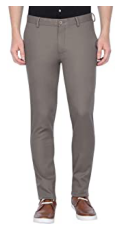

Predicted Label is: [2] 

Input Image is: img187.jpeg


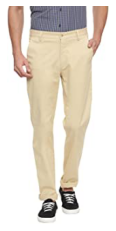

Predicted Label is: [2] 

Input Image is: img188.jpeg


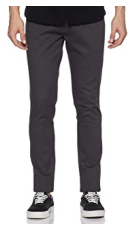

Predicted Label is: [2] 

Input Image is: img190.jpeg


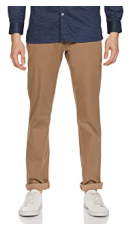

Predicted Label is: [2] 

Input Image is: img199.jpeg


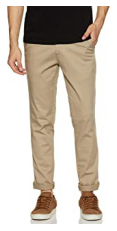

Predicted Label is: [2] 

Input Image is: img2.jpeg


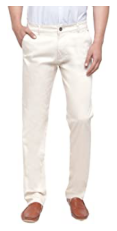

Predicted Label is: [2] 

Input Image is: img20.jpeg


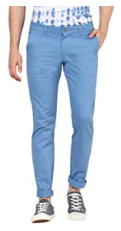

Predicted Label is: [2] 

Input Image is: img201.jpeg


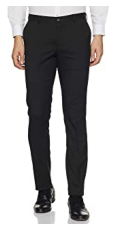

Predicted Label is: [2] 

Input Image is: img203.jpeg


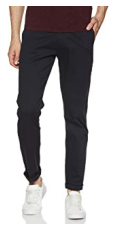

Predicted Label is: [0] 

Input Image is: img206.jpeg


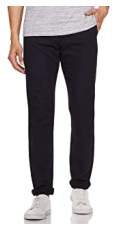

Predicted Label is: [2] 

Input Image is: img211.jpeg


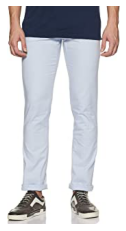

Predicted Label is: [2] 

Input Image is: img220.jpeg


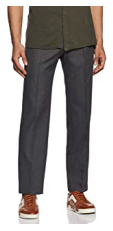

Predicted Label is: [2] 

Input Image is: img225.jpeg


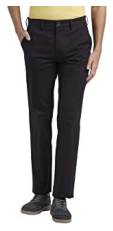

Predicted Label is: [0] 

Input Image is: img227.jpeg


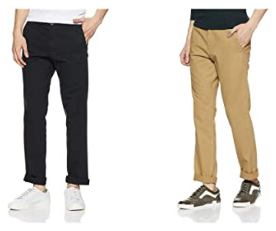

Predicted Label is: [2] 

Input Image is: img234.jpeg


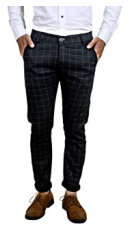

Predicted Label is: [2] 

Input Image is: img245.jpeg


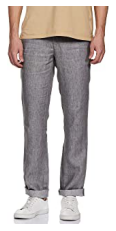

Predicted Label is: [2] 

Input Image is: img254.jpeg


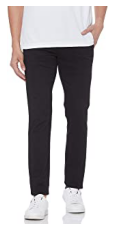

Predicted Label is: [2] 

Input Image is: img256.jpeg


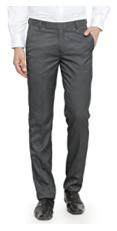

Predicted Label is: [2] 

Input Image is: img258.jpeg


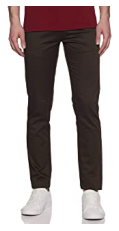

Predicted Label is: [2] 

Input Image is: img264.jpeg


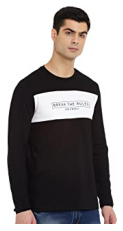

Predicted Label is: [1] 

Input Image is: img266.jpeg


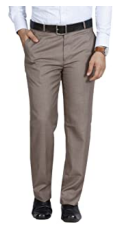

Predicted Label is: [2] 

Input Image is: img273.jpeg


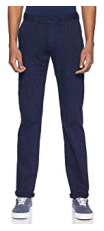

Predicted Label is: [0] 

Input Image is: img274.jpeg


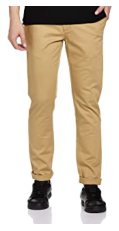

Predicted Label is: [2] 

Input Image is: img277.jpeg


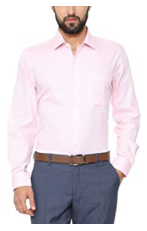

Predicted Label is: [1] 

Input Image is: img292.jpeg


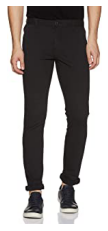

Predicted Label is: [2] 

Input Image is: img294.jpeg


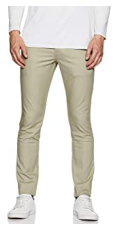

Predicted Label is: [2] 

Input Image is: img296.jpeg


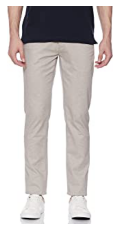

Predicted Label is: [2] 

Input Image is: img299.jpeg


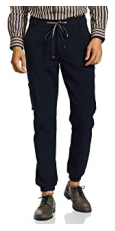

Predicted Label is: [0] 

Input Image is: img305.jpeg


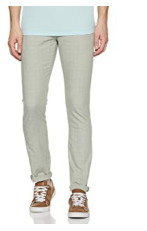

Predicted Label is: [2] 

Input Image is: img36.jpeg


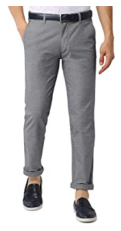

Predicted Label is: [2] 

Input Image is: img51.jpeg


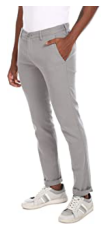

Predicted Label is: [2] 

Input Image is: img54.jpeg


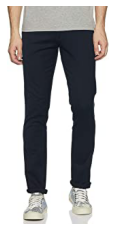

Predicted Label is: [2] 

Input Image is: img57.jpeg


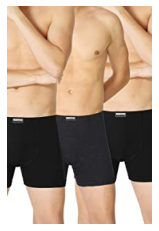

Predicted Label is: [1] 

Input Image is: img76.jpeg


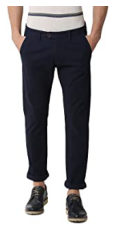

Predicted Label is: [2] 

Input Image is: img78.jpeg


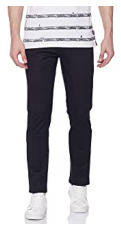

Predicted Label is: [2] 

Input Image is: img83.jpeg


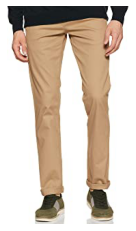

Predicted Label is: [2] 

Input Image is: img88.jpeg


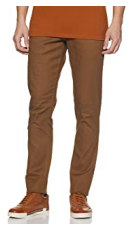

Predicted Label is: [2] 

Input Image is: img90.jpeg


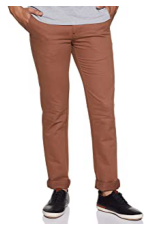

Predicted Label is: [2] 

Input Image is: img92.jpeg


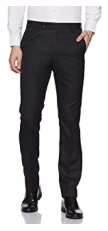

Predicted Label is: [2] 

Input Image is: img93.jpeg


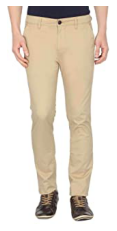

Predicted Label is: [2] 

Input Image is: img94.jpeg


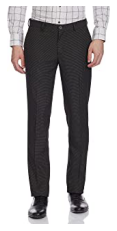

Predicted Label is: [2] 



In [111]:
test_dire=[test_jeans,test_saree,test_trouser]

for test_dir in test_dire:
    for i in listdir(test_dir):
        print("Input Image is:",i)
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(224,224))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = model.predict(test_image)
        print("Predicted Label is:",np.argmax(result, axis=1),"\n")